<a href="https://colab.research.google.com/github/Deanelle/BG-Analysis/blob/main/Blood_Glucose_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question: What patterns exist in my blood glucose over the last two weeks that show I need to change my diabetes treatment plan? 

---



In [ ]:
 #importing the libraries used
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from datetime import datetime 
from matplotlib.dates import date2num

In [ ]:
#loading the data
BG_df=pd.read_csv('Deanelle14dayAprilBG.csv',index_col=0)
BG_df.head()

,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
Index,,,,,,,,,,,,,
1,NaN,FirstName,NaN,Deanelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,LastName,NaN,Thompson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Device,NaN,NaN,Dexcom G5 Mobile App,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Alert,Fall,NaN,NaN,iPhone,NaN,NaN,NaN,NaN,3.0,NaN,NaN
5,NaN,Alert,High,NaN,NaN,iPhone,250,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking the first 15 rows 
BG_df.head(15)

,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
Index,,,,,,,,,,,,,
1,NaN,FirstName,NaN,Deanelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,LastName,NaN,Thompson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Device,NaN,NaN,Dexcom G5 Mobile App,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Alert,Fall,NaN,NaN,iPhone,NaN,NaN,NaN,NaN,3.0,NaN,NaN
5,NaN,Alert,High,NaN,NaN,iPhone,250,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Alert,Low,NaN,NaN,iPhone,80,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Alert,Signal Loss,NaN,NaN,iPhone,NaN,NaN,NaN,00:20:00,NaN,NaN,NaN
8,NaN,Alert,Rise,NaN,NaN,iPhone,NaN,NaN,NaN,NaN,3.0,NaN,NaN
9,NaN,Alert,Urgent Low,NaN,NaN,iPhone,55,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#the last few rows 
BG_df.tail()

,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
Index,,,,,,,,,,,,,
3758,2022-04-23T20:42:57,EGV,NaN,NaN,NaN,iPhone G6,95,NaN,NaN,NaN,NaN,4920374.0,8XMUEE
3759,2022-04-23T20:47:57,EGV,NaN,NaN,NaN,iPhone G6,95,NaN,NaN,NaN,NaN,4920674.0,8XMUEE
3760,2022-04-23T20:52:58,EGV,NaN,NaN,NaN,iPhone G6,96,NaN,NaN,NaN,NaN,4920974.0,8XMUEE
3761,2022-04-23T20:57:58,EGV,NaN,NaN,NaN,iPhone G6,98,NaN,NaN,NaN,NaN,4921274.0,8XMUEE
3762,2022-04-23T21:02:58,EGV,NaN,NaN,NaN,iPhone G6,99,NaN,NaN,NaN,NaN,4921574.0,8XMUEE


In [ ]:
#checking the amount of null values 
BG_df.isnull().sum()

Timestamp (YYYY-MM-DDThh:mm:ss)         17
Event Type                               0
Event Subtype                         3709
Patient Info                          3760
Device Info                           3760
Source Device ID                         2
Glucose Value (mg/dL)                   10
Insulin Value (u)                     3762
Carb Value (grams)                    3762
Duration (hh:mm:ss)                   3760
Glucose Rate of Change (mg/dL/min)    3758
Transmitter Time (Long Integer)         17
Transmitter ID                          17
dtype: int64

In [ ]:
#keeping the relevant columns and dropping the unnecessary ones 

glucose=BG_df[['Timestamp (YYYY-MM-DDThh:mm:ss)','Glucose Value (mg/dL)']]
glucose=glucose.drop([1,2,3,4,5,6,7,8,9,10,11,12])

In [ ]:
#resetting the index

glucose.reset_index(drop=True, inplace=True)
glucose['Timestamp (YYYY-MM-DDThh:mm:ss)']=pd.to_datetime(glucose['Timestamp (YYYY-MM-DDThh:mm:ss)'])

In [ ]:
#renaming the timestamp column 
glucose=glucose.rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)':'Timestamp'})
glucose.head()

,Timestamp,Glucose Value (mg/dL)
0,NaT,85
1,NaT,NaN
2,NaT,NaN
3,NaT,55
4,NaT,55


In [ ]:
#Checking the last few rows in the new df
glucose.tail()

,Timestamp,Glucose Value (mg/dL)
3745,2022-04-23 20:42:57,95
3746,2022-04-23 20:47:57,95
3747,2022-04-23 20:52:58,96
3748,2022-04-23 20:57:58,98
3749,2022-04-23 21:02:58,99


In [ ]:
#what does the first 15 look like 
glucose.head(15)

,Timestamp,Glucose Value (mg/dL)
0,NaT,85
1,NaT,NaN
2,NaT,NaN
3,NaT,55
4,NaT,55
5,2022-04-10 00:02:19,195
6,2022-04-10 00:07:20,195
7,2022-04-10 00:12:19,188
8,2022-04-10 00:17:19,187
9,2022-04-10 00:22:20,188


In [ ]:
#dropping rows with NAT in them 
glucose.drop([0,1,2,3,4],axis=0,inplace=True)
glucose.head()

,Timestamp,Glucose Value (mg/dL)
5,2022-04-10 00:02:19,195
6,2022-04-10 00:07:20,195
7,2022-04-10 00:12:19,188
8,2022-04-10 00:17:19,187
9,2022-04-10 00:22:20,188


In [ ]:
#info about the columns
glucose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3745 entries, 5 to 3749
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              3745 non-null   datetime64[ns]
 1   Glucose Value (mg/dL)  3745 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 87.8+ KB


In [ ]:
#converting glucose vlaue to float 
glucose['Glucose Value (mg/dL)']=pd.to_numeric(glucose['Glucose Value (mg/dL)'],errors='coerce')
glucose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3745 entries, 5 to 3749
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              3745 non-null   datetime64[ns]
 1   Glucose Value (mg/dL)  3705 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 87.8 KB


In [ ]:
#descriptive stats of my glucose
glucose.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose Value (mg/dL),3705.0,131.958704,50.924256,40.0,93.0,123.0,161.0,326.0


Over the past 14 days, my blood glucose average was 131. With the min value being 40 and the maximum value being 326. 

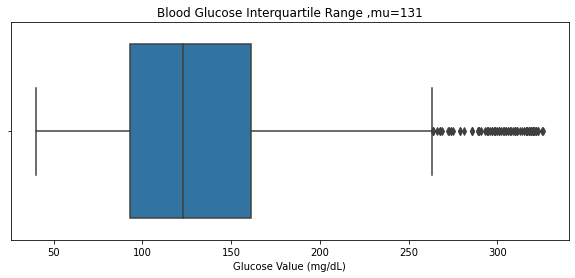

In [ ]:
#IQR 
plt.figure(figsize=(10,4))
sns.boxplot(x=glucose['Glucose Value (mg/dL)'])
plt.title('Blood Glucose Interquartile Range ,mu=131');


Most of the data is between 91 and 161. Points above 260 are classified as outliers 


In [ ]:
#splitting based on day of the week
glucose['Day']=glucose['Timestamp'].dt.day_name()
fig=px.box(glucose, x='Day',y='Glucose Value (mg/dL)',
           points='all',color='Day')
fig.show()

Looking at the box plots, this tells me that my blood glucose generally stays within the 90s and 160s with Thursday's and Monday's being uncharacteristic. It seems like my weekends and on Tuesday my blood sugar does not venture much to the higher numbers. Which makes sense, as my days are slower and calmer during the weekends as opposed to the work week or at the start of the work week. So, possibly being better with stress when work starts during the week. 

In [ ]:
#looking at percent of time spent below, above, and in range 
ranges = [0,70,180,350]
glucose['ranges'] = pd.cut(glucose['Glucose Value (mg/dL)'], bins = ranges)
result = (glucose.groupby([pd.Grouper(key="Timestamp",freq="D"),"ranges"])["ranges"].count()
          .unstack(0).T.fillna(0))

summed_results = result.sum()

In [ ]:
less70 = 'Time<70:'
in_range='Time in range'
greater180='Time> 180:' 
var_percent='%'

print(f'{less70:15} {str(round(summed_results.iloc[0]/summed_results.sum()*100,2))}{var_percent}')
print(f'{in_range:15} {str(round(summed_results.iloc[1]/summed_results.sum()*100,2))}{var_percent}')
print(f'{greater180:15} {str(round(summed_results.iloc[2]/summed_results.sum()*100,2))}{var_percent}')

Time<70:        5.86%
Time in range   79.43%
Time> 180:      14.71%


What could I do to make my time in range increase? 

In [ ]:
#looking at how often glucose values are above or below range
glucose['Aggregate'] = [180 if glucose_val >= 180 else 70 if glucose_val <= 70 else 110 for glucose_val 
                        in glucose['Glucose Value (mg/dL)']]

In [ ]:
fig = px.line(glucose, x="Timestamp", y=["Glucose Value (mg/dL)", "Aggregate"], 
              title='Glucose Value Vs. Time', labels={'Glucose Value (mg/dL)':'Glucose Fluctuation',
                                                     'Aggregate':'Aggregate Blood Glucose'})
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(xaxis_title='Time', yaxis_title='Glucose Value (mg/dL)')
fig.show()


My blood sugar over time at the beginning of April 
```



In [ ]:
#BG rate of change 
glucose['BG Rate of Change']=glucose['Glucose Value (mg/dL)'].diff()/5

glucose[['Timestamp', 'Glucose Value (mg/dL)','BG Rate of Change']].head(20)

,Timestamp,Glucose Value (mg/dL),BG Rate of Change
5,2022-04-10 00:02:19,195.0,NaN
6,2022-04-10 00:07:20,195.0,0.0
7,2022-04-10 00:12:19,188.0,-1.4
8,2022-04-10 00:17:19,187.0,-0.2
9,2022-04-10 00:22:20,188.0,0.2
10,2022-04-10 00:27:19,189.0,0.2
11,2022-04-10 00:32:19,189.0,0.0
12,2022-04-10 00:37:19,185.0,-0.8
13,2022-04-10 00:42:20,175.0,-2.0
14,2022-04-10 00:47:20,161.0,-2.8


Text(0.5, 0, 'BG Rate of Change(mg/dl/minute)')

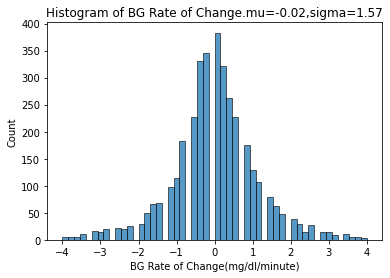

In [ ]:
#rate of change graphed
bg_roc_std= glucose['BG Rate of Change'].std()
bg_roc_mean=glucose['BG Rate of Change'].mean()
sns.histplot(data=glucose, x='BG Rate of Change',binrange=(-4,4))
plt.title(f'Histogram of BG Rate of Change.mu={bg_roc_mean:.2f},sigma={bg_roc_std:.2f}')
plt.xlabel('BG Rate of Change(mg/dl/minute)')

The sigma number tells me that the number of time my blood glucose had a rate of change of 1.5. 

In [ ]:
#Control Variability 
min_max_day=glucose.groupby(pd.Grouper(key='Timestamp',freq='1D')).agg({'Glucose Value (mg/dL)':[np.min, np.max]})

In [ ]:
img = plt.imread('CVGA.png')

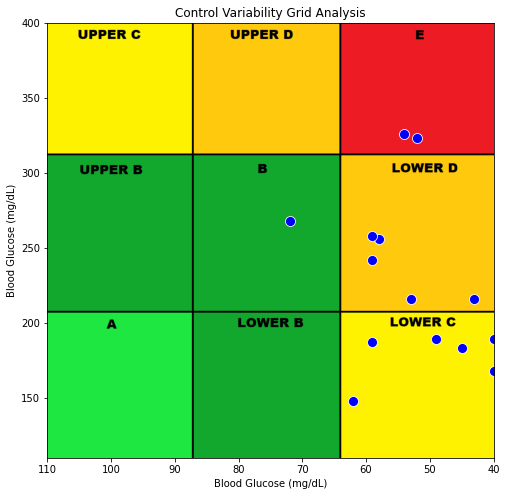

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(data=min_max_day,x=min_max_day['Glucose Value (mg/dL)']['amin'],
                y=min_max_day['Glucose Value (mg/dL)']['amax'], zorder=1,
                color='blue', s=100)
ax.imshow(img, extent=[110, 40, 110, 400], aspect='auto')
plt.title('Control Variability Grid Analysis')
plt.xlabel('Blood Glucose (mg/dL)')
plt.ylabel('Blood Glucose (mg/dL)');

A	Accurate control: X range 110–90 mg/dl and Y range 110–180 mg/dl

Lower B	Benign deviations into hypoglycemia: X = 90–70 mg/dl, Y = 110–180 mg/dl

B	Benign control deviations: X = 90–70 mg/dl and Y = 180–300 mg/dl

Upper B	Benign deviations into hyperglycemia: X = 110–90 mg/dl, Y = 180–300 mg/dl

Lower C	Over-Correction of hyperglycemia: X < 70 mg/dl, Y = 110–180 mg/dl

Upper C	Over-Correction of hypoglycemia: X = 110–90 mg/dl, Y > 300 mg/dl

Lower D	Failure to Deal with hypoglycemia: X < 70 mg/dl, Y = 180–300 mg/dl

Upper D	Failure to Deal with hyperglycemia: X = 90–70 mg/dl, Y > 300 mg/dl

E	Erroneous control: X < 70 mg/dl and Y > 300 mg/dl.

This chart is telling me that I am having trouble over correcting my highs which is leading to issues with hypoglycemia in the lower d section of the chart. This means that I will have to practice more patience when correcting for high blood sugars to avoid those up and down and up rollercoasters of my sugars which could potentially give me a better time in range. 

In [ ]:
#min and max blood sugar over the 14 days
min_max_day

Glucose Value (mg/dL)       
                            amin   amax
Timestamp                              
2022-04-10                  43.0  216.0
2022-04-11                  72.0  268.0
2022-04-12                  59.0  187.0
2022-04-13                  59.0  242.0
2022-04-14                  52.0  323.0
2022-04-15                  49.0  189.0
2022-04-16                  58.0  256.0
2022-04-17                  53.0  216.0
2022-04-18                  54.0  326.0
2022-04-19                  40.0  189.0
2022-04-20                  45.0  183.0
2022-04-21                  62.0  148.0
2022-04-22                  59.0  258.0
2022-04-23                  40.0  168.0

I am having a lot of lows. Maybe potentially setting a temporary basal and making sure I am not missing meals to help with the constant lows. 

In [ ]:
# Import lowess from the statsmodels library
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
filteres= lowess(glucose['Glucose Value (mg/dL)'], glucose['Timestamp'], is_sorted=True, frac=0.015, it=0) #0.025
filtered = pd.to_datetime(filteres[:,0], format='%Y-%m-%dT%H:%M:%S') 

Text(0, 0.5, 'Glucose')

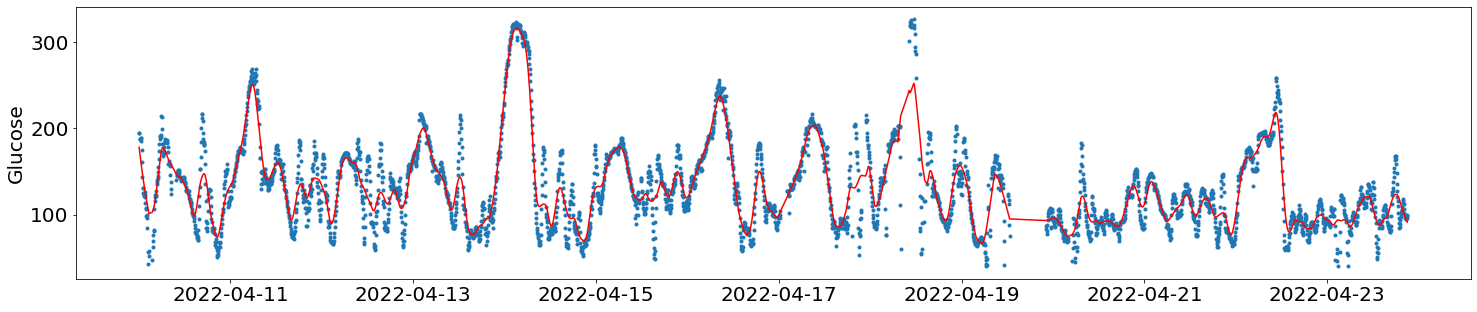

In [ ]:
# Set sizes
plt.figure(figsize=(25,5))
plt.rcParams.update({'font.size': 20})

# Same plot as before
plt.plot(glucose['Timestamp'], glucose['Glucose Value (mg/dL)'], '.')

# Plot smoothed data
plt.plot(filtered, filteres[:,1], 'r')

#Labels
plt.ylabel('Glucose')

Text(0, 0.5, 'Count')

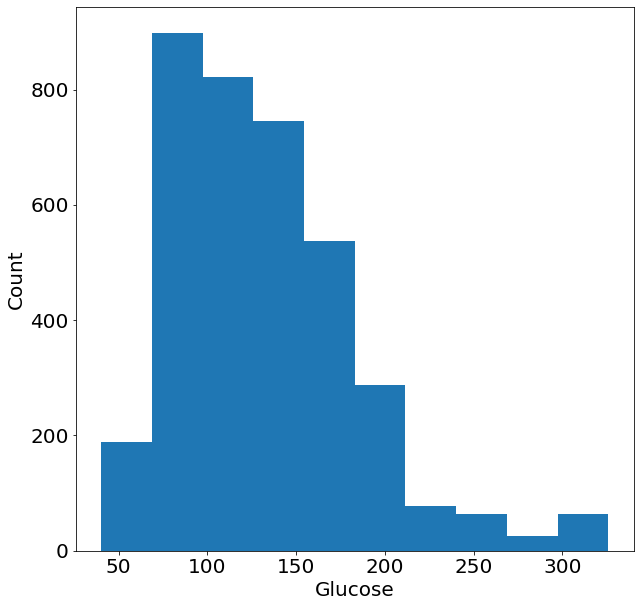

In [ ]:
#determining the distribution of the glucose in the data
# Set sizes
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})

# Plot histogram
plt.hist(glucose['Glucose Value (mg/dL)'])

# Labels
plt.xlabel('Glucose')
plt.ylabel('Count')

Like from the box plots earlier, most of my glucose stays between 90 and 160. With most the numbers c